In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configurações para melhor visualização no Jupyter
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid') # Usando um estilo disponível
pd.set_option('display.max_columns', None) # Mostrar todas as colunas do DataFrame
pd.set_option('display.max_colwidth', None) # Mostrar todo o conteúdo das colunas

In [3]:
# Ajuste o caminho se o seu arquivo tiver um nome ou local ligeiramente diferente
# O notebook está em 'notebooks/', então precisamos voltar um nível para 'src/'
file_path = '/home/gibson/projetos/analise-gastos-publicos-ia/src/data/src/data/raw/gastos_cartao_01-2024_a_01-2024_pagina_1.csv' # CONFIRME O NOME DO SEU ARQUIVO!

try:
    df_cartao = pd.read_csv(file_path)
    print("Dados carregados com sucesso!")
except FileNotFoundError:
    print(f"Erro: Arquivo não encontrado em '{file_path}'. Verifique o caminho e o nome do arquivo.")
    # Se der erro, pare aqui e verifique o nome/caminho do arquivo no seu diretório src/data/raw/

Dados carregados com sucesso!


In [4]:
if 'df_cartao' in locals(): # Verifica se o df_cartao foi carregado
    print("### Informações Gerais do DataFrame ###")
    df_cartao.info()

    print("\n### Primeiras Linhas ###")
    display(df_cartao.head()) # 'display()' é melhor para DataFrames no Jupyter

    print("\n### Últimas Linhas ###")
    display(df_cartao.tail())

    print("\n### Dimensões (Linhas, Colunas) ###")
    print(df_cartao.shape)

    print("\n### Nomes das Colunas ###")
    print(df_cartao.columns.tolist())

### Informações Gerais do DataFrame ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               15 non-null     int64 
 1   mesExtrato       15 non-null     object
 2   dataTransacao    15 non-null     object
 3   valorTransacao   15 non-null     object
 4   tipoCartao       15 non-null     object
 5   estabelecimento  15 non-null     object
 6   unidadeGestora   15 non-null     object
 7   portador         15 non-null     object
dtypes: int64(1), object(7)
memory usage: 1.1+ KB

### Primeiras Linhas ###


,id,mesExtrato,dataTransacao,valorTransacao,tipoCartao,estabelecimento,unidadeGestora,portador
0,458494653,01/2024,28/11/2023,"97,89","{'id': 1, 'codigo': '1', 'descricao': 'Cartão de Pagamento do Governo Federal - CPGF'}","{'id': 5818721, 'cpfFormatado': '', 'cnpjFormatado': '42.270.058/0001-03', 'numeroInscricaoSocial': '', 'nome': 'G M R EQUIPAMENTOS ELETRICOS LTDA', 'razaoSocialReceita': 'G M R EQUIPAMENTOS ELETRICOS LTDA', 'nomeFantasiaReceita': '', 'tipo': 'Entidades Empresariais Privadas'}","{'codigo': '158482', 'nome': 'CAMPUS DUQUE DE CAXIAS', 'descricaoPoder': 'EXECUTIVO', 'orgaoVinculado': {'codigoSIAFI': '26433', 'cnpj': '10952708000104', 'sigla': 'IFRJ', 'nome': 'Instituto Federal de Educação, Ciência e Tecnologia do Rio de Janeiro'}, 'orgaoMaximo': {'codigo': '26000', 'sigla': 'MEC', 'nome': 'Ministério da Educação'}}","{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}"
1,458494717,01/2024,28/11/2023,"1.173,05","{'id': 1, 'codigo': '1', 'descricao': 'Cartão de Pagamento do Governo Federal - CPGF'}","{'id': 567220049, 'cpfFormatado': '', 'cnpjFormatado': '29.911.559/0014-70', 'numeroInscricaoSocial': '', 'nome': 'FORNECEDORA CHATUBA DE NILOPOLIS S.A.', 'razaoSocialReceita': 'FORNECEDORA CHATUBA DE NILOPOLIS S.A.', 'nomeFantasiaReceita': 'CHATUBA MATERIAIS DE CONSTRUCAO', 'tipo': 'Entidades Empresariais Privadas'}","{'codigo': '158482', 'nome': 'CAMPUS DUQUE DE CAXIAS', 'descricaoPoder': 'EXECUTIVO', 'orgaoVinculado': {'codigoSIAFI': '26433', 'cnpj': '10952708000104', 'sigla': 'IFRJ', 'nome': 'Instituto Federal de Educação, Ciência e Tecnologia do Rio de Janeiro'}, 'orgaoMaximo': {'codigo': '26000', 'sigla': 'MEC', 'nome': 'Ministério da Educação'}}","{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}"
2,458494781,01/2024,01/12/2023,"9,70","{'id': 1, 'codigo': '1', 'descricao': 'Cartão de Pagamento do Governo Federal - CPGF'}","{'id': 6619685, 'cpfFormatado': '', 'cnpjFormatado': '43.283.811/0115-18', 'numeroInscricaoSocial': '', 'nome': 'KALUNGA SA', 'razaoSocialReceita': 'KALUNGA SA', 'nomeFantasiaReceita': '', 'tipo': 'Entidades Empresariais Privadas'}","{'codigo': '158482', 'nome': 'CAMPUS DUQUE DE CAXIAS', 'descricaoPoder': 'EXECUTIVO', 'orgaoVinculado': {'codigoSIAFI': '26433', 'cnpj': '10952708000104', 'sigla': 'IFRJ', 'nome': 'Instituto Federal de Educação, Ciência e Tecnologia do Rio de Janeiro'}, 'orgaoMaximo': {'codigo': '26000', 'sigla': 'MEC', 'nome': 'Ministério da Educação'}}","{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}"
3,458494845,01/2024,01/12/2023,"86,82","{'id': 1, 'codigo': '1', 'descricao': 'Cartão de Pagamento do Governo Federal - CPGF'}","{'id': 567220049, 'cpfFormatado': '', 'cnpjFormatado': '29.911.559/0014-70', 'numeroInscricaoSocial': '', 'nome': 'FORNECEDORA CHATUBA DE NILOPOLIS S.A.', 'razaoSocialReceita': 'FORNECEDORA CHATUBA DE NILOPOLIS S.A.', 'nomeFantasiaReceita': 'CHATUBA MATERIAIS DE CONSTRUCAO', 'tipo': 'Entidades Empresariais Privadas'}","{'codigo': '158482', 'nome': 'CAMPUS DUQUE DE CAXIAS', 'descricaoPoder': 'EXECUTIVO', 'orgaoVinculado': {'codigoSIAFI': '26433', 'cnpj': '10952708000104', 'sigla': 'IFRJ', 'nome': 'Instituto Federal de Educação, Ciência e Tecnologia do Rio de Janeiro'}, 'orgaoMaximo': {'codigo': '26000', 'sigla': 'MEC', 'nome': 'Ministério da Educação'}}","{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}"
4,458494909,01/2024,02/12/2023,"64,60","{'id': 1, 'codigo': '1', 'descricao': 'Cartão de Pagamento do Governo Federal - CPGF'}","{'id': -1, 'cpfFormatado': '', 'cnpjFormatado': '', 'numeroInscricaoSocial': '', 'nome': 'SEM INFORMACAO', 'razaoSocialReceita': 'SEM INFORMACAO', 'nomeFantasiaReceita': 'SEM INFORMACAO', 'tipo': 'Sem Informação'}","{'codigo': '158482', 'nome': 'CAMPUS DUQUE DE CAXIAS', 'descricaoPoder': 'EXECUTIVO', 'orgaoVinculado': {'codigoSIAFI': '26433', 'cnpj': '10952708000104', 'sigla': 'IFRJ'


### Últimas Linhas ###


,id,mesExtrato,dataTransacao,valorTransacao,tipoCartao,estabelecimento,unidadeGestora,portador
10,458495293,01/2024,19/12/2023,"3.339,59","{'id': 1, 'codigo': '1', 'descricao': 'Cartão de Pagamento do Governo Federal - CPGF'}","{'id': 366217510, 'cpfFormatado': '', 'cnpjFormatado': '19.861.984/0001-23', 'numeroInscricaoSocial': '', 'nome': 'F GARCIA VIANA', 'razaoSocialReceita': 'F GARCIA VIANA', 'nomeFantasiaReceita': 'BOA VISTA TACOGRAFO', 'tipo': 'Entidades Empresariais Privadas'}","{'codigo': '135005', 'nome': 'EMBRAPA/CPAF-RR', 'descricaoPoder': 'EXECUTIVO', 'orgaoVinculado': {'codigoSIAFI': '22202', 'cnpj': '00348003000110', 'sigla': 'EMBRAPA', 'nome': 'Empresa Brasileira de Pesquisa Agropecuária'}, 'orgaoMaximo': {'codigo': '22000', 'sigla': 'MAPA', 'nome': 'Ministério da Agricultura e Pecuária'}}","{'cpfFormatado': '***.588.328-**', 'nis': '', 'nome': 'LUIZ VICENTE PEREIRA'}"
11,458495357,01/2024,27/11/2023,"490,00","{'id': 1, 'codigo': '1', 'descricao': 'Cartão de Pagamento do Governo Federal - CPGF'}","{'id': 173616765, 'cpfFormatado': '', 'cnpjFormatado': '04.153.583/0001-41', 'numeroInscricaoSocial': '', 'nome': 'E. F. DE OLIVEIRA GHAMMACHI', 'razaoSocialReceita': 'E. F. DE OLIVEIRA GHAMMACHI', 'nomeFantasiaReceita': 'MEGAFIO MALHARIA', 'tipo': 'Entidades Empresariais Privadas'}","{'codigo': '135008', 'nome': 'EMBRAPA/CPAF-AP', 'descricaoPoder': 'EXECUTIVO', 'orgaoVinculado': {'codigoSIAFI': '22202', 'cnpj': '00348003000110', 'sigla': 'EMBRAPA', 'nome': 'Empresa Brasileira de Pesquisa Agropecuária'}, 'orgaoMaximo': {'codigo': '22000', 'sigla': 'MAPA', 'nome': 'Ministério da Agricultura e Pecuária'}}","{'cpfFormatado': '***.382.302-**', 'nis': '', 'nome': 'BENEDITO PONTES SILVA'}"
12,458495421,01/2024,29/11/2023,"250,00","{'id': 1, 'codigo': '1', 'descricao': 'Cartão de Pagamento do Governo Federal - CPGF'}","{'id': 605017808, 'cpfFormatado': '', 'cnpjFormatado': '51.195.790/0003-00', 'numeroInscricaoSocial': '', 'nome': 'PERIM COMERCIO DE AUTO PECAS LTDA', 'razaoSocialReceita': 'PERIM COMERCIO DE AUTO PECAS LTDA', 'nomeFantasiaReceita': 'AUTOPECAS PERIM', 'tipo': 'Entidades Empresariais Privadas'}","{'codigo': '795140', 'nome': '3.BATALHAO DE INFANTARIA DE FUZILEIROS NAVAIS', 'descricaoPoder': 'EXECUTIVO', 'orgaoVinculado': {'codigoSIAFI': '52131', 'cnpj': '00394502000144', 'sigla': 'CMDO MARINHA', 'nome': 'Comando da Marinha'}, 'orgaoMaximo': {'codigo': '52000', 'sigla': 'DEFESA', 'nome': 'Ministério da Defesa'}}","{'cpfFormatado': '***.402.476-**', 'nis': '', 'nome': 'EDILBERTO CARLOS DA ROCHA JUNIOR'}"
13,458495485,01/2024,01/12/2023,"78,00","{'id': 1, 'codigo': '1', 'descricao': 'Cartão de Pagamento do Governo Federal - CPGF'}","{'id': 430518269, 'cpfFormatado': '', 'cnpjFormatado': '04.521.917/0001-92', 'numeroInscricaoSocial': '', 'nome': 'WATFA DAYCHOUM', 'razaoSocialReceita': 'WATFA DAYCHOUM', 'nomeFantasiaReceita': 'CIA DOS PARAFUSOS', 'tipo': 'Entidades Empresariais Privadas'}","{'codigo': '795140', 'nome': '3.BATALHAO DE INFANTARIA DE FUZILEIROS NAVAIS', 'descricaoPoder': 'EXECUTIVO', 'orgaoVinculado': {'codigoSIAFI': '52131', 'cnpj': '00394502000144', 'sigla': 'CMDO MARINHA', 'nome': 'Comando da Marinha'}, 'orgaoMaximo': {'codigo': '52000', 'sigla': 'DEFESA', 'nome': 'Ministério da Defesa'}}","{'cpfFormatado': '***.402.476-**', 'nis': '', 'nome': 'EDILBERTO CARLOS DA ROCHA JUNIOR'}"
14,458495549,01/2024,08/12/2023,"3.670,00","{'id': 1, 'codigo': '1', 'descricao': 'Cartão de Pagamento do Governo Federal - CPGF'}","{'id': 362217549, 'cpfFormatado': '', 'cnpjFormatado': '26.551.460/0001-00', 'numeroInscricaoSocial': '', 'nome': 'M&M DA ILHA MATERIAL DE CONSTRUCAO LTDA', 'razaoSocialReceita': 'M&M DA ILHA MATERIAL DE CONSTRUCAO LTDA', 'nomeFantasiaReceita': '', 'tipo': 'Entidades Empresariais Privadas'}","{'codigo': '795140', 'nome': '3.BATALHAO DE INFANTARIA DE FUZILEIROS NAVAIS', 'descricaoPoder': 'EXECUTIVO', 'orgaoVinculado': {'codigoSIAFI': '52131', 'cnpj': '00394502000144', 'sigla': 'CMDO MARINHA', 'n


### Dimensões (Linhas, Colunas) ###
(15, 8)

### Nomes das Colunas ###
['id', 'mesExtrato', 'dataTransacao', 'valorTransacao', 'tipoCartao', 'estabelecimento', 'unidadeGestora', 'portador']


In [5]:
if 'df_cartao' in locals():
    print("\n### Contagem de Valores Ausentes por Coluna ###")
    print(df_cartao.isnull().sum())

    # Percentual de valores ausentes
    print("\n### Percentual de Valores Ausentes por Coluna ###")
    print((df_cartao.isnull().sum() / len(df_cartao)) * 100)


### Contagem de Valores Ausentes por Coluna ###
id                 0
mesExtrato         0
dataTransacao      0
valorTransacao     0
tipoCartao         0
estabelecimento    0
unidadeGestora     0
portador           0
dtype: int64

### Percentual de Valores Ausentes por Coluna ###
id                 0.0
mesExtrato         0.0
dataTransacao      0.0
valorTransacao     0.0
tipoCartao         0.0
estabelecimento    0.0
unidadeGestora     0.0
portador           0.0
dtype: float64



### Contagem de Valores para a Coluna: unidadeGestora ###
unidadeGestora
{'codigo': '158482', 'nome': 'CAMPUS DUQUE DE CAXIAS', 'descricaoPoder': 'EXECUTIVO', 'orgaoVinculado': {'codigoSIAFI': '26433', 'cnpj': '10952708000104', 'sigla': 'IFRJ', 'nome': 'Instituto Federal de Educação, Ciência e Tecnologia do Rio de Janeiro'}, 'orgaoMaximo': {'codigo': '26000', 'sigla': 'MEC', 'nome': 'Ministério da Educação'}}    8
{'codigo': '135005', 'nome': 'EMBRAPA/CPAF-RR', 'descricaoPoder': 'EXECUTIVO', 'orgaoVinculado': {'codigoSIAFI': '22202', 'cnpj': '00348003000110', 'sigla': 'EMBRAPA', 'nome': 'Empresa Brasileira de Pesquisa Agropecuária'}, 'orgaoMaximo': {'codigo': '22000', 'sigla': 'MAPA', 'nome': 'Ministério da Agricultura e Pecuária'}}                   3
{'codigo': '795140', 'nome': '3.BATALHAO DE INFANTARIA DE FUZILEIROS NAVAIS', 'descricaoPoder': 'EXECUTIVO', 'orgaoVinculado': {'codigoSIAFI': '52131', 'cnpj': '00394502000144', 'sigla': 'CMDO MARINHA', 'nome': 'Comando da Marinha'}, 'o

count      15.000000
mean      772.172667
std      1160.025965
min         9.700000
25%        84.715000
50%       254.580000
75%       755.375000
max      3670.000000
Name: valorTransacao, dtype: float64

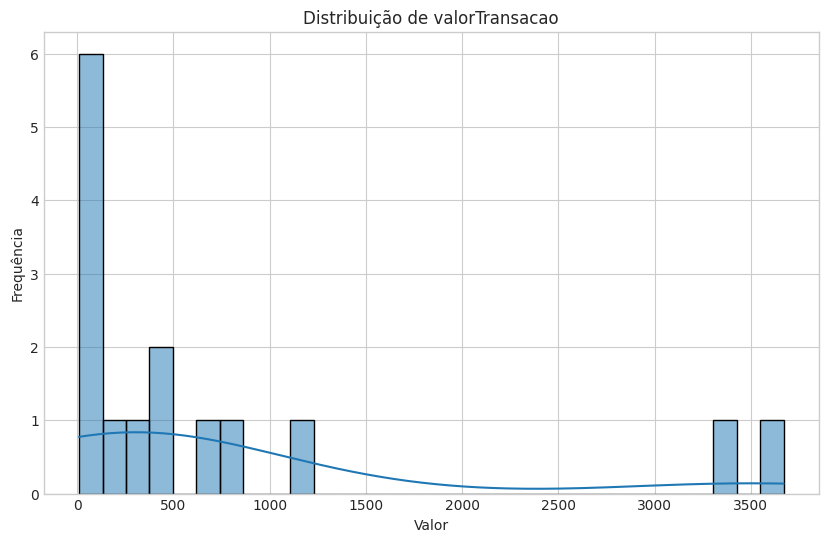

In [7]:
# Exemplo: Quais órgãos/entidades aparecem mais? E os tipos de transação?
# Identifique colunas que pareçam categóricas e interessantes (ex: nome do órgão, tipo de despesa)
if 'df_cartao' in locals():
    colunas_categoricas_exemplo = ['unidadeGestora', 'unidadeGestora', 'tipoCartao', 'portador'] # Ajuste com nomes reais das suas colunas

    for col in colunas_categoricas_exemplo:
        if col in df_cartao.columns:
            print(f"\n### Contagem de Valores para a Coluna: {col} ###")
            print(df_cartao[col].value_counts(dropna=False).head(10)) # Mostra os 10 mais frequentes
        else:
            print(f"\nColuna '{col}' não encontrada no DataFrame.")

    # Para a coluna de valor da transação (vamos supor que se chama 'valorTransacao')
    # Primeiro, precisamos garantir que ela é numérica. A API às vezes retorna valores como string com vírgula.
    # Vamos verificar e converter se necessário.
    coluna_valor = 'valorTransacao' # CONFIRME O NOME DA COLUNA DE VALOR NO SEU CSV
    if coluna_valor in df_cartao.columns:
        print(f"\n### Análise da Coluna de Valor: {coluna_valor} ###")
        # Verificar tipo da coluna de valor
        print(f"Tipo original da coluna '{coluna_valor}': {df_cartao[coluna_valor].dtype}")

        # Tentativa de converter para numérico (se for string com vírgula como decimal)
        if df_cartao[coluna_valor].dtype == 'object':
            try:
                # Substitui vírgula por ponto e converte para float
                df_cartao[coluna_valor] = df_cartao[coluna_valor].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)
                print(f"Coluna '{coluna_valor}' convertida para float.")
            except Exception as e:
                print(f"Não foi possível converter a coluna '{coluna_valor}' para numérico: {e}")

        # Se a conversão funcionou ou já era numérica:
        if pd.api.types.is_numeric_dtype(df_cartao[coluna_valor]):
            print(f"\nEstatísticas para '{coluna_valor}':")
            display(df_cartao[coluna_valor].describe())

            # Histograma do valor da transação
            plt.figure(figsize=(10, 6))
            sns.histplot(df_cartao[coluna_valor], kde=True, bins=30)
            plt.title(f'Distribuição de {coluna_valor}')
            plt.xlabel('Valor')
            plt.ylabel('Frequência')
            plt.show()
        else:
            print(f"Coluna '{coluna_valor}' não é numérica, pulando histograma.")

In [8]:
if 'df_cartao' in locals():
    colunas_potencialmente_aninhadas = ['portador', 'unidadeGestora', 'tipoCartao'] # Adicione outras que suspeitar
    for col in colunas_potencialmente_aninhadas:
        if col in df_cartao.columns:
            print(f"\n--- Inspecionando Coluna: {col} ---")
            print(f"Tipo de dados da coluna: {df_cartao[col].dtype}")
            print("Primeiro valor (exemplo):")
            # Usamos try-except porque .iloc[0] pode falhar se o DataFrame estiver vazio para algum filtro anterior
            try:
                # Verificamos se há pelo menos uma linha e se o valor não é NaN (comum em dados ausentes)
                if not df_cartao.empty and pd.notna(df_cartao[col].iloc[0]):
                    display(df_cartao[col].iloc[0])
                elif df_cartao.empty:
                    print("DataFrame está vazio.")
                else:
                    print("Primeiro valor é NaN ou ausente.")

            except IndexError:
                print("Coluna vazia ou DataFrame vazio.")
            except Exception as e:
                print(f"Erro ao acessar o primeiro valor: {e}")
        else:
            print(f"Coluna '{col}' não encontrada.")


--- Inspecionando Coluna: portador ---
Tipo de dados da coluna: object
Primeiro valor (exemplo):


"{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}"


--- Inspecionando Coluna: unidadeGestora ---
Tipo de dados da coluna: object
Primeiro valor (exemplo):


"{'codigo': '158482', 'nome': 'CAMPUS DUQUE DE CAXIAS', 'descricaoPoder': 'EXECUTIVO', 'orgaoVinculado': {'codigoSIAFI': '26433', 'cnpj': '10952708000104', 'sigla': 'IFRJ', 'nome': 'Instituto Federal de Educação, Ciência e Tecnologia do Rio de Janeiro'}, 'orgaoMaximo': {'codigo': '26000', 'sigla': 'MEC', 'nome': 'Ministério da Educação'}}"


--- Inspecionando Coluna: tipoCartao ---
Tipo de dados da coluna: object
Primeiro valor (exemplo):


"{'id': 1, 'codigo': '1', 'descricao': 'Cartão de Pagamento do Governo Federal - CPGF'}"

In [37]:
import ast # Módulo para Abstract Syntax Tree, usado para 'literal_eval'
import pandas as pd # Certifique-se de que pandas está importado se for uma nova sessão

if 'df_cartao' in locals():
    print("DataFrame original (primeiras linhas da coluna 'portador'):")
    try:
        if not df_cartao.empty and 'portador' in df_cartao.columns:
            display(df_cartao['portador'].head())
            print(f"Tipo do primeiro elemento da coluna 'portador': {type(df_cartao['portador'].iloc[0])}")
        elif 'portador' not in df_cartao.columns:
            print("Coluna 'portador' não encontrada.")
        else:
            print("DataFrame df_cartao está vazio.")
    except Exception as e:
        print(f"Erro ao exibir df_cartao['portador']: {e}")

    # Função para converter strings para dicionários de forma segura
    def string_para_dict(dict_string):
        if pd.isna(dict_string): # Se for NaN, retorna None (ou um dict vazio {})
            return None
        if isinstance(dict_string, dict): # Se já for um dict, retorna ele mesmo
            return dict_string
        try:
            return ast.literal_eval(dict_string)
        except (ValueError, SyntaxError):
            # Se não for uma string de dicionário válida, retorna None (ou um dict vazio)
            print(f"Aviso: Não foi possível converter a string para dict: {dict_string[:100]}...") # Mostra parte da string
            return None

    # Aplicar a conversão à coluna 'portador' para criar uma nova coluna de dicionários
    # É melhor criar uma nova coluna para não modificar a original durante a experimentação
    if 'portador' in df_cartao.columns:
        print("\nConvertendo strings da coluna 'portador' para dicionários...")
        df_cartao['portador_dict'] = df_cartao['portador'].apply(string_para_dict)

        # Agora vamos usar 'portador_dict' para as operações de expansão

        # --- Método 1: Usando .apply(pd.Series) ---
        print("\n--- Usando .apply(pd.Series) na coluna 'portador_dict' ---")
        # Filtra para garantir que estamos lidando com dicionários válidos após a conversão
        portador_series_validos = df_cartao['portador_dict'].dropna().loc[df_cartao['portador_dict'].apply(type) == dict]

        if not portador_series_validos.empty:
            df_portador_flat_apply = portador_series_validos.apply(pd.Series)
            df_portador_flat_apply = df_portador_flat_apply.add_prefix('portador_')
            print("Novas colunas criadas com .apply(pd.Series) (primeiras linhas):")
            display(df_portador_flat_apply.head())

            df_cartao_expandido_apply = df_cartao.join(df_portador_flat_apply)
            print("\nDataFrame original com colunas 'portador' expandidas usando .apply(pd.Series) (primeiras linhas):")
            colunas_para_mostrar = ['portador_dict'] + [col for col in df_cartao_expandido_apply.columns if 'portador_' in col]
            if 'valorTransacao' in df_cartao_expandido_apply.columns:
                colunas_para_mostrar.append('valorTransacao')
            display(df_cartao_expandido_apply[colunas_para_mostrar].head())
        else:
            print("Não há dicionários válidos na coluna 'portador_dict' para expandir com .apply(pd.Series).")

        # --- Método 2: Usando pd.json_normalize() ---
        print("\n\n--- Usando pd.json_normalize() na coluna 'portador_dict' ---")
        # Filtra novamente para pegar apenas os dicionários da coluna convertida
        lista_de_dicionarios_portador = df_cartao['portador_dict'].dropna().loc[df_cartao['portador_dict'].apply(type) == dict].tolist()

        if lista_de_dicionarios_portador:
            df_portador_flat_normalize = pd.json_normalize(lista_de_dicionarios_portador)
            df_portador_flat_normalize = df_portador_flat_normalize.add_prefix('portador_norm_')
            print("Novas colunas criadas com pd.json_normalize() (primeiras linhas):")
            display(df_portador_flat_normalize.head())
            
            indices_validos = df_cartao['portador_dict'].dropna().loc[df_cartao['portador_dict'].apply(type) == dict].index
            df_portador_flat_normalize.index = indices_validos

            df_cartao_expandido_normalize = df_cartao.join(df_portador_flat_normalize)
            print("\nDataFrame original com colunas 'portador' expandidas usando pd.json_normalize() (primeiras linhas):")
            colunas_para_mostrar_norm = ['portador_dict'] + [col for col in df_cartao_expandido_normalize.columns if 'portador_norm_' in col]
            if 'valorTransacao' in df_cartao_expandido_normalize.columns:
                colunas_para_mostrar_norm.append('valorTransacao')
            display(df_cartao_expandido_normalize[colunas_para_mostrar_norm].head())
        else:
            print("Não há dicionários válidos na coluna 'portador_dict' para expandir com pd.json_normalize().")

        # Opcional: remover a coluna intermediária 'portador_dict' se não for mais necessária
        # df_cartao.drop('portador_dict', axis=1, inplace=True)
    else:
        print("Coluna 'portador' não encontrada para processamento.")
else:
    print("DataFrame 'df_cartao' não foi encontrado. Execute as células anteriores para carregá-lo.")

DataFrame original (primeiras linhas da coluna 'portador'):


0    {'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}
1    {'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}
2    {'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}
3    {'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}
4    {'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}
Name: portador, dtype: object

Tipo do primeiro elemento da coluna 'portador': <class 'str'>

Convertendo strings da coluna 'portador' para dicionários...

--- Usando .apply(pd.Series) na coluna 'portador_dict' ---
Novas colunas criadas com .apply(pd.Series) (primeiras linhas):


,portador_cpfFormatado,portador_nis,portador_nome
0,***.122.497-**,,DANIEL DIAS LEONARDO MARTINS
1,***.122.497-**,,DANIEL DIAS LEONARDO MARTINS
2,***.122.497-**,,DANIEL DIAS LEONARDO MARTINS
3,***.122.497-**,,DANIEL DIAS LEONARDO MARTINS
4,***.122.497-**,,DANIEL DIAS LEONARDO MARTINS



DataFrame original com colunas 'portador' expandidas usando .apply(pd.Series) (primeiras linhas):


,portador_dict,portador_dict,portador_cpfFormatado,portador_nis,portador_nome,valorTransacao
0,"{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}","{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}",***.122.497-**,,DANIEL DIAS LEONARDO MARTINS,97.89
1,"{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}","{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}",***.122.497-**,,DANIEL DIAS LEONARDO MARTINS,1173.05
2,"{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}","{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}",***.122.497-**,,DANIEL DIAS LEONARDO MARTINS,9.70
3,"{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}","{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}",***.122.497-**,,DANIEL DIAS LEONARDO MARTINS,86.82
4,"{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}","{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}",***.122.497-**,,DANIEL DIAS LEONARDO MARTINS,64.60




--- Usando pd.json_normalize() na coluna 'portador_dict' ---
Novas colunas criadas com pd.json_normalize() (primeiras linhas):


,portador_norm_cpfFormatado,portador_norm_nis,portador_norm_nome
0,***.122.497-**,,DANIEL DIAS LEONARDO MARTINS
1,***.122.497-**,,DANIEL DIAS LEONARDO MARTINS
2,***.122.497-**,,DANIEL DIAS LEONARDO MARTINS
3,***.122.497-**,,DANIEL DIAS LEONARDO MARTINS
4,***.122.497-**,,DANIEL DIAS LEONARDO MARTINS



DataFrame original com colunas 'portador' expandidas usando pd.json_normalize() (primeiras linhas):


,portador_dict,portador_norm_cpfFormatado,portador_norm_nis,portador_norm_nome,valorTransacao
0,"{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}",***.122.497-**,,DANIEL DIAS LEONARDO MARTINS,97.89
1,"{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}",***.122.497-**,,DANIEL DIAS LEONARDO MARTINS,1173.05
2,"{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}",***.122.497-**,,DANIEL DIAS LEONARDO MARTINS,9.70
3,"{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}",***.122.497-**,,DANIEL DIAS LEONARDO MARTINS,86.82
4,"{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}",***.122.497-**,,DANIEL DIAS LEONARDO MARTINS,64.60


In [38]:
df_cartao

,id,mesExtrato,dataTransacao,valorTransacao,tipoCartao,estabelecimento,unidadeGestora,portador,portador_dict
0,458494653,01/2024,28/11/2023,97.89,"{'id': 1, 'codigo': '1', 'descricao': 'Cartão de Pagamento do Governo Federal - CPGF'}","{'id': 5818721, 'cpfFormatado': '', 'cnpjFormatado': '42.270.058/0001-03', 'numeroInscricaoSocial': '', 'nome': 'G M R EQUIPAMENTOS ELETRICOS LTDA', 'razaoSocialReceita': 'G M R EQUIPAMENTOS ELETRICOS LTDA', 'nomeFantasiaReceita': '', 'tipo': 'Entidades Empresariais Privadas'}","{'codigo': '158482', 'nome': 'CAMPUS DUQUE DE CAXIAS', 'descricaoPoder': 'EXECUTIVO', 'orgaoVinculado': {'codigoSIAFI': '26433', 'cnpj': '10952708000104', 'sigla': 'IFRJ', 'nome': 'Instituto Federal de Educação, Ciência e Tecnologia do Rio de Janeiro'}, 'orgaoMaximo': {'codigo': '26000', 'sigla': 'MEC', 'nome': 'Ministério da Educação'}}","{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}","{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}"
1,458494717,01/2024,28/11/2023,1173.05,"{'id': 1, 'codigo': '1', 'descricao': 'Cartão de Pagamento do Governo Federal - CPGF'}","{'id': 567220049, 'cpfFormatado': '', 'cnpjFormatado': '29.911.559/0014-70', 'numeroInscricaoSocial': '', 'nome': 'FORNECEDORA CHATUBA DE NILOPOLIS S.A.', 'razaoSocialReceita': 'FORNECEDORA CHATUBA DE NILOPOLIS S.A.', 'nomeFantasiaReceita': 'CHATUBA MATERIAIS DE CONSTRUCAO', 'tipo': 'Entidades Empresariais Privadas'}","{'codigo': '158482', 'nome': 'CAMPUS DUQUE DE CAXIAS', 'descricaoPoder': 'EXECUTIVO', 'orgaoVinculado': {'codigoSIAFI': '26433', 'cnpj': '10952708000104', 'sigla': 'IFRJ', 'nome': 'Instituto Federal de Educação, Ciência e Tecnologia do Rio de Janeiro'}, 'orgaoMaximo': {'codigo': '26000', 'sigla': 'MEC', 'nome': 'Ministério da Educação'}}","{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}","{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}"
2,458494781,01/2024,01/12/2023,9.70,"{'id': 1, 'codigo': '1', 'descricao': 'Cartão de Pagamento do Governo Federal - CPGF'}","{'id': 6619685, 'cpfFormatado': '', 'cnpjFormatado': '43.283.811/0115-18', 'numeroInscricaoSocial': '', 'nome': 'KALUNGA SA', 'razaoSocialReceita': 'KALUNGA SA', 'nomeFantasiaReceita': '', 'tipo': 'Entidades Empresariais Privadas'}","{'codigo': '158482', 'nome': 'CAMPUS DUQUE DE CAXIAS', 'descricaoPoder': 'EXECUTIVO', 'orgaoVinculado': {'codigoSIAFI': '26433', 'cnpj': '10952708000104', 'sigla': 'IFRJ', 'nome': 'Instituto Federal de Educação, Ciência e Tecnologia do Rio de Janeiro'}, 'orgaoMaximo': {'codigo': '26000', 'sigla': 'MEC', 'nome': 'Ministério da Educação'}}","{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}","{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}"
3,458494845,01/2024,01/12/2023,86.82,"{'id': 1, 'codigo': '1', 'descricao': 'Cartão de Pagamento do Governo Federal - CPGF'}","{'id': 567220049, 'cpfFormatado': '', 'cnpjFormatado': '29.911.559/0014-70', 'numeroInscricaoSocial': '', 'nome': 'FORNECEDORA CHATUBA DE NILOPOLIS S.A.', 'razaoSocialReceita': 'FORNECEDORA CHATUBA DE NILOPOLIS S.A.', 'nomeFantasiaReceita': 'CHATUBA MATERIAIS DE CONSTRUCAO', 'tipo': 'Entidades Empresariais Privadas'}","{'codigo': '158482', 'nome': 'CAMPUS DUQUE DE CAXIAS', 'descricaoPoder': 'EXECUTIVO', 'orgaoVinculado': {'codigoSIAFI': '26433', 'cnpj': '10952708000104', 'sigla': 'IFRJ', 'nome': 'Instituto Federal de Educação, Ciência e Tecnologia do Rio de Janeiro'}, 'orgaoMaximo': {'codigo': '26000', 'sigla': 'MEC', 'nome': 'Ministério da Educação'}}","{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}","{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}"
4,458494909,01/2024,02/12/2023,64.60,"{'id': 1, 'codigo': '1', 'descricao': 'Cartão de Pagamento do Governo Federal - CPGF'}","{'id': -1, 'cpfFormatado': '', 

In [39]:
df_cartao.columns.tolist()

['id',
 'mesExtrato',
 'dataTransacao',
 'valorTransacao',
 'tipoCartao',
 'estabelecimento',
 'unidadeGestora',
 'portador',
 'portador_dict']

In [40]:
df_portador_flat_normalize

,portador_norm_cpfFormatado,portador_norm_nis,portador_norm_nome
0,***.122.497-**,,DANIEL DIAS LEONARDO MARTINS
1,***.122.497-**,,DANIEL DIAS LEONARDO MARTINS
2,***.122.497-**,,DANIEL DIAS LEONARDO MARTINS
3,***.122.497-**,,DANIEL DIAS LEONARDO MARTINS
4,***.122.497-**,,DANIEL DIAS LEONARDO MARTINS
5,***.122.497-**,,DANIEL DIAS LEONARDO MARTINS
6,***.122.497-**,,DANIEL DIAS LEONARDO MARTINS
7,***.122.497-**,,DANIEL DIAS LEONARDO MARTINS
8,***.588.328-**,,LUIZ VICENTE PEREIRA
9,***.588.328-**,,LUIZ VICENTE PEREIRA


In [41]:
df_cartao=df_cartao.join(df_portador_flat_normalize)

In [42]:
df_cartao

,id,mesExtrato,dataTransacao,valorTransacao,tipoCartao,estabelecimento,unidadeGestora,portador,portador_dict,portador_norm_cpfFormatado,portador_norm_nis,portador_norm_nome
0,458494653,01/2024,28/11/2023,97.89,"{'id': 1, 'codigo': '1', 'descricao': 'Cartão de Pagamento do Governo Federal - CPGF'}","{'id': 5818721, 'cpfFormatado': '', 'cnpjFormatado': '42.270.058/0001-03', 'numeroInscricaoSocial': '', 'nome': 'G M R EQUIPAMENTOS ELETRICOS LTDA', 'razaoSocialReceita': 'G M R EQUIPAMENTOS ELETRICOS LTDA', 'nomeFantasiaReceita': '', 'tipo': 'Entidades Empresariais Privadas'}","{'codigo': '158482', 'nome': 'CAMPUS DUQUE DE CAXIAS', 'descricaoPoder': 'EXECUTIVO', 'orgaoVinculado': {'codigoSIAFI': '26433', 'cnpj': '10952708000104', 'sigla': 'IFRJ', 'nome': 'Instituto Federal de Educação, Ciência e Tecnologia do Rio de Janeiro'}, 'orgaoMaximo': {'codigo': '26000', 'sigla': 'MEC', 'nome': 'Ministério da Educação'}}","{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}","{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}",***.122.497-**,,DANIEL DIAS LEONARDO MARTINS
1,458494717,01/2024,28/11/2023,1173.05,"{'id': 1, 'codigo': '1', 'descricao': 'Cartão de Pagamento do Governo Federal - CPGF'}","{'id': 567220049, 'cpfFormatado': '', 'cnpjFormatado': '29.911.559/0014-70', 'numeroInscricaoSocial': '', 'nome': 'FORNECEDORA CHATUBA DE NILOPOLIS S.A.', 'razaoSocialReceita': 'FORNECEDORA CHATUBA DE NILOPOLIS S.A.', 'nomeFantasiaReceita': 'CHATUBA MATERIAIS DE CONSTRUCAO', 'tipo': 'Entidades Empresariais Privadas'}","{'codigo': '158482', 'nome': 'CAMPUS DUQUE DE CAXIAS', 'descricaoPoder': 'EXECUTIVO', 'orgaoVinculado': {'codigoSIAFI': '26433', 'cnpj': '10952708000104', 'sigla': 'IFRJ', 'nome': 'Instituto Federal de Educação, Ciência e Tecnologia do Rio de Janeiro'}, 'orgaoMaximo': {'codigo': '26000', 'sigla': 'MEC', 'nome': 'Ministério da Educação'}}","{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}","{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}",***.122.497-**,,DANIEL DIAS LEONARDO MARTINS
2,458494781,01/2024,01/12/2023,9.70,"{'id': 1, 'codigo': '1', 'descricao': 'Cartão de Pagamento do Governo Federal - CPGF'}","{'id': 6619685, 'cpfFormatado': '', 'cnpjFormatado': '43.283.811/0115-18', 'numeroInscricaoSocial': '', 'nome': 'KALUNGA SA', 'razaoSocialReceita': 'KALUNGA SA', 'nomeFantasiaReceita': '', 'tipo': 'Entidades Empresariais Privadas'}","{'codigo': '158482', 'nome': 'CAMPUS DUQUE DE CAXIAS', 'descricaoPoder': 'EXECUTIVO', 'orgaoVinculado': {'codigoSIAFI': '26433', 'cnpj': '10952708000104', 'sigla': 'IFRJ', 'nome': 'Instituto Federal de Educação, Ciência e Tecnologia do Rio de Janeiro'}, 'orgaoMaximo': {'codigo': '26000', 'sigla': 'MEC', 'nome': 'Ministério da Educação'}}","{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}","{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}",***.122.497-**,,DANIEL DIAS LEONARDO MARTINS
3,458494845,01/2024,01/12/2023,86.82,"{'id': 1, 'codigo': '1', 'descricao': 'Cartão de Pagamento do Governo Federal - CPGF'}","{'id': 567220049, 'cpfFormatado': '', 'cnpjFormatado': '29.911.559/0014-70', 'numeroInscricaoSocial': '', 'nome': 'FORNECEDORA CHATUBA DE NILOPOLIS S.A.', 'razaoSocialReceita': 'FORNECEDORA CHATUBA DE NILOPOLIS S.A.', 'nomeFantasiaReceita': 'CHATUBA MATERIAIS DE CONSTRUCAO', 'tipo': 'Entidades Empresariais Privadas'}","{'codigo': '158482', 'nome': 'CAMPUS DUQUE DE CAXIAS', 'descricaoPoder': 'EXECUTIVO', 'orgaoVinculado': {'codigoSIAFI': '26433', 'cnpj': '10952708000104', 'sigla': 'IFRJ', 'nome': 'Instituto Federal de Educação, Ciência e Tecnologia do Rio de Janeiro'}, 'orgaoMaximo': {'codigo': '26000', 'sigla': 'MEC', 'nome': 'Ministério da Educação'}}","{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}","{'cpfFormatado': '***.122.497-**', 'nis': '', 

In [43]:
df_cartao['portador'].drop()

ValueError: Need to specify at least one of 'labels', 'index' or 'columns'

In [45]:
df_cartao.drop('portador_dict',axis=1)

,id,mesExtrato,dataTransacao,valorTransacao,tipoCartao,estabelecimento,unidadeGestora,portador,portador_norm_cpfFormatado,portador_norm_nis,portador_norm_nome
0,458494653,01/2024,28/11/2023,97.89,"{'id': 1, 'codigo': '1', 'descricao': 'Cartão de Pagamento do Governo Federal - CPGF'}","{'id': 5818721, 'cpfFormatado': '', 'cnpjFormatado': '42.270.058/0001-03', 'numeroInscricaoSocial': '', 'nome': 'G M R EQUIPAMENTOS ELETRICOS LTDA', 'razaoSocialReceita': 'G M R EQUIPAMENTOS ELETRICOS LTDA', 'nomeFantasiaReceita': '', 'tipo': 'Entidades Empresariais Privadas'}","{'codigo': '158482', 'nome': 'CAMPUS DUQUE DE CAXIAS', 'descricaoPoder': 'EXECUTIVO', 'orgaoVinculado': {'codigoSIAFI': '26433', 'cnpj': '10952708000104', 'sigla': 'IFRJ', 'nome': 'Instituto Federal de Educação, Ciência e Tecnologia do Rio de Janeiro'}, 'orgaoMaximo': {'codigo': '26000', 'sigla': 'MEC', 'nome': 'Ministério da Educação'}}","{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}",***.122.497-**,,DANIEL DIAS LEONARDO MARTINS
1,458494717,01/2024,28/11/2023,1173.05,"{'id': 1, 'codigo': '1', 'descricao': 'Cartão de Pagamento do Governo Federal - CPGF'}","{'id': 567220049, 'cpfFormatado': '', 'cnpjFormatado': '29.911.559/0014-70', 'numeroInscricaoSocial': '', 'nome': 'FORNECEDORA CHATUBA DE NILOPOLIS S.A.', 'razaoSocialReceita': 'FORNECEDORA CHATUBA DE NILOPOLIS S.A.', 'nomeFantasiaReceita': 'CHATUBA MATERIAIS DE CONSTRUCAO', 'tipo': 'Entidades Empresariais Privadas'}","{'codigo': '158482', 'nome': 'CAMPUS DUQUE DE CAXIAS', 'descricaoPoder': 'EXECUTIVO', 'orgaoVinculado': {'codigoSIAFI': '26433', 'cnpj': '10952708000104', 'sigla': 'IFRJ', 'nome': 'Instituto Federal de Educação, Ciência e Tecnologia do Rio de Janeiro'}, 'orgaoMaximo': {'codigo': '26000', 'sigla': 'MEC', 'nome': 'Ministério da Educação'}}","{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}",***.122.497-**,,DANIEL DIAS LEONARDO MARTINS
2,458494781,01/2024,01/12/2023,9.70,"{'id': 1, 'codigo': '1', 'descricao': 'Cartão de Pagamento do Governo Federal - CPGF'}","{'id': 6619685, 'cpfFormatado': '', 'cnpjFormatado': '43.283.811/0115-18', 'numeroInscricaoSocial': '', 'nome': 'KALUNGA SA', 'razaoSocialReceita': 'KALUNGA SA', 'nomeFantasiaReceita': '', 'tipo': 'Entidades Empresariais Privadas'}","{'codigo': '158482', 'nome': 'CAMPUS DUQUE DE CAXIAS', 'descricaoPoder': 'EXECUTIVO', 'orgaoVinculado': {'codigoSIAFI': '26433', 'cnpj': '10952708000104', 'sigla': 'IFRJ', 'nome': 'Instituto Federal de Educação, Ciência e Tecnologia do Rio de Janeiro'}, 'orgaoMaximo': {'codigo': '26000', 'sigla': 'MEC', 'nome': 'Ministério da Educação'}}","{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}",***.122.497-**,,DANIEL DIAS LEONARDO MARTINS
3,458494845,01/2024,01/12/2023,86.82,"{'id': 1, 'codigo': '1', 'descricao': 'Cartão de Pagamento do Governo Federal - CPGF'}","{'id': 567220049, 'cpfFormatado': '', 'cnpjFormatado': '29.911.559/0014-70', 'numeroInscricaoSocial': '', 'nome': 'FORNECEDORA CHATUBA DE NILOPOLIS S.A.', 'razaoSocialReceita': 'FORNECEDORA CHATUBA DE NILOPOLIS S.A.', 'nomeFantasiaReceita': 'CHATUBA MATERIAIS DE CONSTRUCAO', 'tipo': 'Entidades Empresariais Privadas'}","{'codigo': '158482', 'nome': 'CAMPUS DUQUE DE CAXIAS', 'descricaoPoder': 'EXECUTIVO', 'orgaoVinculado': {'codigoSIAFI': '26433', 'cnpj': '10952708000104', 'sigla': 'IFRJ', 'nome': 'Instituto Federal de Educação, Ciência e Tecnologia do Rio de Janeiro'}, 'orgaoMaximo': {'codigo': '26000', 'sigla': 'MEC', 'nome': 'Ministério da Educação'}}","{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}",***.122.497-**,,DANIEL DIAS LEONARDO MARTINS
4,458494909,01/2024,02/12/2023,64.60,"{'id': 1, 'codigo': '1', 'descricao': 'Cartão de Pagamento do Governo Federal - CPGF'}","{'id': -1, 'cpfFormatado': '', 'cnpjFormatado': '', 'numeroInscricaoSocial': '', 'nome': 'SEM INFORMACAO', 'razaoSocialReceita': 'SEM INFORMACAO', 'nomeF

In [46]:
df_cartao

,id,mesExtrato,dataTransacao,valorTransacao,tipoCartao,estabelecimento,unidadeGestora,portador,portador_dict,portador_norm_cpfFormatado,portador_norm_nis,portador_norm_nome
0,458494653,01/2024,28/11/2023,97.89,"{'id': 1, 'codigo': '1', 'descricao': 'Cartão de Pagamento do Governo Federal - CPGF'}","{'id': 5818721, 'cpfFormatado': '', 'cnpjFormatado': '42.270.058/0001-03', 'numeroInscricaoSocial': '', 'nome': 'G M R EQUIPAMENTOS ELETRICOS LTDA', 'razaoSocialReceita': 'G M R EQUIPAMENTOS ELETRICOS LTDA', 'nomeFantasiaReceita': '', 'tipo': 'Entidades Empresariais Privadas'}","{'codigo': '158482', 'nome': 'CAMPUS DUQUE DE CAXIAS', 'descricaoPoder': 'EXECUTIVO', 'orgaoVinculado': {'codigoSIAFI': '26433', 'cnpj': '10952708000104', 'sigla': 'IFRJ', 'nome': 'Instituto Federal de Educação, Ciência e Tecnologia do Rio de Janeiro'}, 'orgaoMaximo': {'codigo': '26000', 'sigla': 'MEC', 'nome': 'Ministério da Educação'}}","{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}","{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}",***.122.497-**,,DANIEL DIAS LEONARDO MARTINS
1,458494717,01/2024,28/11/2023,1173.05,"{'id': 1, 'codigo': '1', 'descricao': 'Cartão de Pagamento do Governo Federal - CPGF'}","{'id': 567220049, 'cpfFormatado': '', 'cnpjFormatado': '29.911.559/0014-70', 'numeroInscricaoSocial': '', 'nome': 'FORNECEDORA CHATUBA DE NILOPOLIS S.A.', 'razaoSocialReceita': 'FORNECEDORA CHATUBA DE NILOPOLIS S.A.', 'nomeFantasiaReceita': 'CHATUBA MATERIAIS DE CONSTRUCAO', 'tipo': 'Entidades Empresariais Privadas'}","{'codigo': '158482', 'nome': 'CAMPUS DUQUE DE CAXIAS', 'descricaoPoder': 'EXECUTIVO', 'orgaoVinculado': {'codigoSIAFI': '26433', 'cnpj': '10952708000104', 'sigla': 'IFRJ', 'nome': 'Instituto Federal de Educação, Ciência e Tecnologia do Rio de Janeiro'}, 'orgaoMaximo': {'codigo': '26000', 'sigla': 'MEC', 'nome': 'Ministério da Educação'}}","{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}","{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}",***.122.497-**,,DANIEL DIAS LEONARDO MARTINS
2,458494781,01/2024,01/12/2023,9.70,"{'id': 1, 'codigo': '1', 'descricao': 'Cartão de Pagamento do Governo Federal - CPGF'}","{'id': 6619685, 'cpfFormatado': '', 'cnpjFormatado': '43.283.811/0115-18', 'numeroInscricaoSocial': '', 'nome': 'KALUNGA SA', 'razaoSocialReceita': 'KALUNGA SA', 'nomeFantasiaReceita': '', 'tipo': 'Entidades Empresariais Privadas'}","{'codigo': '158482', 'nome': 'CAMPUS DUQUE DE CAXIAS', 'descricaoPoder': 'EXECUTIVO', 'orgaoVinculado': {'codigoSIAFI': '26433', 'cnpj': '10952708000104', 'sigla': 'IFRJ', 'nome': 'Instituto Federal de Educação, Ciência e Tecnologia do Rio de Janeiro'}, 'orgaoMaximo': {'codigo': '26000', 'sigla': 'MEC', 'nome': 'Ministério da Educação'}}","{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}","{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}",***.122.497-**,,DANIEL DIAS LEONARDO MARTINS
3,458494845,01/2024,01/12/2023,86.82,"{'id': 1, 'codigo': '1', 'descricao': 'Cartão de Pagamento do Governo Federal - CPGF'}","{'id': 567220049, 'cpfFormatado': '', 'cnpjFormatado': '29.911.559/0014-70', 'numeroInscricaoSocial': '', 'nome': 'FORNECEDORA CHATUBA DE NILOPOLIS S.A.', 'razaoSocialReceita': 'FORNECEDORA CHATUBA DE NILOPOLIS S.A.', 'nomeFantasiaReceita': 'CHATUBA MATERIAIS DE CONSTRUCAO', 'tipo': 'Entidades Empresariais Privadas'}","{'codigo': '158482', 'nome': 'CAMPUS DUQUE DE CAXIAS', 'descricaoPoder': 'EXECUTIVO', 'orgaoVinculado': {'codigoSIAFI': '26433', 'cnpj': '10952708000104', 'sigla': 'IFRJ', 'nome': 'Instituto Federal de Educação, Ciência e Tecnologia do Rio de Janeiro'}, 'orgaoMaximo': {'codigo': '26000', 'sigla': 'MEC', 'nome': 'Ministério da Educação'}}","{'cpfFormatado': '***.122.497-**', 'nis': '', 'nome': 'DANIEL DIAS LEONARDO MARTINS'}","{'cpfFormatado': '***.122.497-**', 'nis': '', 